In [10]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
# from sympy import symbols, Matrix
# from fractions import Fraction
# xxx = symbols("x")

In [ ]:
def plot(f, interval=[0, 10]):
    x = np.linspace(interval[0], interval[1], 1000)
    # y = f(x)
    y = list()
    for i in range(len(x)):
        y.append(f(x[i]))
    y = np.array(y)
    plt.figure()
    plt.plot(x, y, "bh", linewidth=1.1)


In [29]:
def plotmult(listF, interval=[0,10]):
    x = np.linspace(interval[0], interval[1], 1000)
    for f in listF:
        y = list()
        for i in range(len(x)):
            y.append(f(x[i]))
        y = np.array(y)
        plt.plot(x, y) 
    plt.show()

In [11]:
def deriv(f,x,h=0.0001):
    res = (f(x+h)-f(x))/h
    return res
    #for i in np.linspace(interval[0]+h,interval[1]-h,10000):


In [12]:
def der(f,x,h=0.00001,pos='c'):
    if pos == 'r': res = -(f(x-h)-f(x))/h
    if pos == 'l': res = (f(x+h)-f(x))/h
    ld = -(f(x-h)-f(x))/h
    rd =  (f(x+h)-f(x))/h
    if np.allclose([ld],[rd]): return rd
    else:
        print('h = {}: too large.'.format(h))
        print(ld)
        print(rd)
        if h < 0.00000001: return None
        h = h/10
        return der(f,x,h)


In [13]:
def ex(x): return der(np.exp,x)


In [14]:
for i in np.linspace(0,1,10):
    if abs(np.exp(i) - ex(i)) > 0.01:
        print(i)
        break

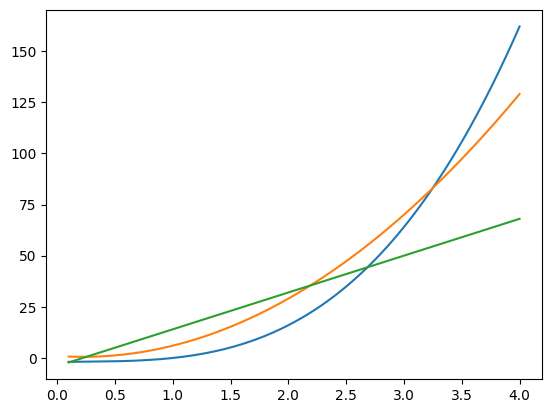

In [28]:
def f(x): return 3*x**3 - 2*x**2 + x - 2
def fl(x): return deriv(f,x)
def fll(x): return deriv(fl,x)

plotmult([f,fl,fll],[0.1,4])